<a href="https://colab.research.google.com/github/ErickNoGit/Machine-Learning/blob/main/analise_descritiva_de_alimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ingredientes e alérgenos alimentares**

*Isso pode ser usado para o modelo de detecção de alérgenos, análise de similaridade de ingredientes.*

### Tópicos de resolução de problema preditivo

1.  Definição da questão a ser resolvida ( business case );
2.  Definição dos dados necessários ao desenvolvimento do caso;
3.  Coleta dos dados (evitando vícios de amostragem);
4.  Limpeza e tratamento dos dados (quando necessário);
5.  Análise descritiva (resumos estatísticos e visualização gráfica);
6.  Escolha de um modelo (algoritmo) preditivo;
7.  Ajuste (treino) do modelo (do algoritmo);
8.  Teste do modelo para verificação da sua performance preditiva;
9.  Entrega do modelo para validação e utilização pelo cliente;
10. Feedback do cliente para ajustes e melhoramentos do modelo.

## **1.** Questão a ser resolvida (business case);


### Modelos e análises potenciais:

**Modelo de detecção de alérgenos:** pode prever se contém alérgenos ou não

**Análise de similaridade de ingredientes:** Esta análise pode fornecer informações sobre semelhanças e diferenças entre os diferentes tipos de pratos.

**Análise de prevalência de alérgenos:** Pode obter insights sobre a prevalência de diferentes alérgenos em produtos alimentícios.

**Sistemas de recomendação:** O conjunto de dados também pode ser usado para desenvolver sistemas de recomendação para indivíduos com restrições ou alergias alimentares específicas.

*O modelo selecionado será o preditivo **Modelo de detecção de alérgenos** com abordagem supervisionada, a variável ``` Y = CONTEM OU NÃO ```. Classificação dicotomica*



## **2.** Definição dos dados necessários ao desenvolvimento do caso;



A base de dados em ```.csv``` foi obtida através do kaggle, nesse link:

https://www.kaggle.com/datasets/uom190346a/food-ingredients-and-allergens

### **3.** Coleta dos dados (evitando vícios de amostragem);

### Sobre o conjunto de dados:

O conjunto de **dados de alérgenos** alimentares é uma coleção de informações sobre alérgenos presentes em vários itens alimentares. O conjunto de dados contém informações sobre alérgenos para uma variedade de ingredientes alimentares, permitindo a identificação e análise de possíveis alérgenos em diferentes pratos e produtos. Serve como um recurso valioso para pesquisadores, fabricantes de alimentos, profissionais de saúde e indivíduos com alergias alimentares.

**Tamanho:** O conjunto de dados consiste em um total de 400 registros, com cada registro representando um item alimentar específico e seus alérgenos associados.

**Alérgenos:** O conjunto de dados inclui uma lista abrangente de alérgenos encontrados nos itens alimentares. Esses alérgenos abrangem uma ampla gama de ingredientes, como laticínios, trigo, nozes ( amêndoas, amendoins, pinhões ), frutos do mar ( anchovas, peixes, frutos do mar ), grãos ( aveia, arroz ), ingredientes à base de animais ( frango, carne de porco ), ingredientes à base de plantas ( celaria, mostarda, soja ) e ingredientes comuns ( cacau, ovos ). Além disso, o conjunto de dados contém entradas nas quais nenhum alérgeno específico está listado.

**Estrutura de dados** - O conjunto de dados é estruturado com várias colunas para fornecer informações detalhadas. As colunas incluem:

**Item alimentar:** representa o nome do item alimentar.

**Ingredientes:** lista os ingredientes presentes no item alimentar, classificados em diferentes colunas, como açúcar, sal, óleo, especiarias, etc.

**Alérgenos:** indica os alérgenos associados ao item alimentar, incluindo os ingredientes alergênicos específicos presentes.

**Previsão:** produtos alimentares que contenham alérgenos e aqueles que não contêm.



## **4.** Limpeza e tratamento dos dados (quando necessário);

In [182]:
# Bibliotecas padrão
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [183]:
# Carregando base de dados do DataFrame
csv = '/content/food_ingredients_and_allergens.csv'
df = pd.read_csv(csv)
df

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Prediction
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains
3,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains
4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,Contains
...,...,...,...,...,...,...,...
394,Lemon Bars,Lemon juice,Sugar,Butter,"Flour, eggs","Wheat, Dairy, Eggs",Contains
395,Pecan Pie,Pecans,Sugar,Butter,Corn syrup,"Wheat, Dairy, Nuts",Contains
396,Zucchini Bread,Zucchini,Sugar,Butter,"Cinnamon, nuts","Wheat, Dairy, Nuts",Contains
397,Banana Bread,Bananas,Sugar,Butter,"Cinnamon, nuts","Wheat, Dairy, Nuts",Contains


In [184]:
# Destacando informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Food Product     399 non-null    object
 1   Main Ingredient  399 non-null    object
 2   Sweetener        399 non-null    object
 3   Fat/Oil          399 non-null    object
 4   Seasoning        399 non-null    object
 5   Allergens        399 non-null    object
 6   Prediction       398 non-null    object
dtypes: object(7)
memory usage: 21.9+ KB


In [185]:
# Tratamento do nome das colunas para reduzir código e facilitar entendimento
coluns_rename = ['food', 'ingredient', 'sweet', 'fat', 'seasoning', 'allergens', 'prediction']
df.columns = coluns_rename
df

,food,ingredient,sweet,fat,seasoning,allergens,prediction
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains
3,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains
4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,Contains
...,...,...,...,...,...,...,...
394,Lemon Bars,Lemon juice,Sugar,Butter,"Flour, eggs","Wheat, Dairy, Eggs",Contains
395,Pecan Pie,Pecans,Sugar,Butter,Corn syrup,"Wheat, Dairy, Nuts",Contains
396,Zucchini Bread,Zucchini,Sugar,Butter,"Cinnamon, nuts","Wheat, Dairy, Nuts",Contains
397,Banana Bread,Bananas,Sugar,Butter,"Cinnamon, nuts","Wheat, Dairy, Nuts",Contains


Obtendo dados de contagem, unificando valores iguais e retornando a soma da contagem. Por coluna do DataFrame.

In [186]:
print('Coluna de classificação dos Food')
objeto = np.unique(np.array(df['food']))
print(objeto, '\n')
print('Percebe-se que a coluna de alimentos (food) contem {} tipos para classificação'.format(pd.Series(objeto).value_counts().sum()))

Coluna de classificação dos Food
['Almond Cookies' 'Aloo Gobi' 'Aloo Paratha' 'Apple' 'Apple Cider'
 'Apple Crisp' 'Apple Pie' 'Avocado Toast' 'BBQ Ribs'
 'Bacon-Wrapped Shrimp' 'Baked Apple' 'Baked Brie' 'Baked Chicken Wings'
 'Baked Cod' 'Baked Garlic Parmesan Chicken' 'Baked Salmon' 'Baked Ziti'
 'Banana Bread' 'Banana Pudding' 'Banana Smoothie' 'Beef Burger'
 'Beef Burritos' 'Beef Chili' 'Beef Kabobs' 'Beef Stir-Fry'
 'Beef Stroganoff' 'Beef Tacos' 'Beef Wellington' 'Beef and Broccoli'
 'Beef and Mushroom Stir-Fry' 'Berry Cobbler' 'Berry Crumble'
 'Berry Parfait' 'Berry Smoothie' 'Biryani' 'Black Bean Soup'
 'Blueberry Muffins' 'Blueberry Pancakes' 'Brussels Sprouts'
 'Buffalo Wings' 'Butter Chicken' 'Butter Naan' 'Butternut Squash Soup'
 'Cabbage Rolls' 'Caesar Pasta Salad' 'Caesar Salad' 'Caesar Salad Wrap'
 'Caesar Shrimp Skewers' 'Caesar Wrap' 'Caprese Salad' 'Caprese Sandwich'
 'Caprese Skewers' 'Caramel Apple' 'Caramel Popcorn' 'Caramelized Onions'
 'Carrot Cake' 'Chana Masal

In [187]:
print('Coluna de classificação dos Ingredient')
objeto = np.unique(np.array(df['ingredient']))
print(objeto, '\n')
print('Percebe-se que a coluna de indgredientes (ingredient) contem {} tipos para classificação'.format(pd.Series(objeto).value_counts().sum()))

Coluna de classificação dos Ingredient
['Almonds' 'Apples' 'Arborio rice' 'Avocado' 'Bacon' 'Bananas'
 'Basmati rice' 'Beef' 'Bell peppers' 'Berries' 'Black beans'
 'Blueberries' 'Bread' 'Brie cheese' 'Brussels sprouts' 'Buttermilk'
 'Butternut squash' 'Cabbage' 'Carrots' 'Cauliflower' 'Cheese' 'Chicken'
 'Chicken breast' 'Chicken broth' 'Chicken wings' 'Chickpeas' 'Chocolate'
 'Cod' 'Cottage cheese' 'Cream cheese' 'Cucumber' 'Cucumbers' 'Dough'
 'Eggplant' 'Eggs' 'Fermented batter' 'Fish' 'Fish (salmon, tuna)'
 'Fish fillets' 'Flour' 'Graham crackers' 'Greek yogurt' 'Grilled chicken'
 'Ground beef' 'Kidney beans' 'Ladyfingers' 'Lamb' 'Lamb/Chicken'
 'Lemon juice' 'Lentil dumplings' 'Lentils' 'Lime juice' 'Lobster' 'Mango'
 'Milk' 'Milk solids' 'Miso paste' 'Mixed berries' 'Mixed fruits'
 'Mixed vegetables' 'Mushrooms' 'Mutton' 'Oats' 'Onions' 'Oranges'
 'Paneer' 'Pasta' 'Peanuts' 'Pecans' 'Pesto sauce' 'Pineapple'
 'Pizza dough' 'Popcorn' 'Pork ribs' 'Portobello mushrooms' 'Potato'
 '

In [188]:
print('Coluna de classificação dos Sweet')
objeto = np.unique(np.array(df['sweet']))
print(objeto, '\n')
print('Percebe-se que a coluna de adoçante (sweet) contem {} tipos para classificação'.format(pd.Series(objeto).value_counts().sum()))

Coluna de classificação dos Sweet
['Brown sugar' 'Caramel' 'Cocoa butter' 'Honey' 'Marshmallows'
 'Mayonnaise' 'None' 'Rice vinegar' 'Sugar' 'Tamarind'] 

Percebe-se que a coluna de adoçante (sweet) contem 10 tipos para classificação


In [189]:
print('Coluna de classificação dos Fat')
objeto = np.unique(np.array(df['fat']))
print(objeto, '\n')
print('Percebe-se que a coluna de gordura/oleo (fat) contem {} tipos para classificação'.format(pd.Series(objeto).value_counts().sum()))

Coluna de classificação dos Fat
['Avocado' 'Bacon' 'Bread crumbs, Parmesan cheese' 'Butter'
 'Caesar dressing' 'Cheese' 'Chocolate' 'Coconut milk' 'Coconut oil'
 'Cream' 'Cream cheese, sour cream' 'Enchilada sauce' 'Ghee' 'Heavy cream'
 'Mascarpone cheese' 'Mascarpone cheese, coffee liqueur' 'Mayonnaise'
 'Milk' 'Milk powder' 'Milk, Ghee' 'Mustard' 'None' 'Oil' 'Olive oil'
 'Pancetta' 'Peanut butter' 'Peanut oil' 'Pesto sauce' 'Sesame oil'
 'Sour cream' 'Soy sauce' 'Vegetable oil' 'Water' 'Whipped cream' 'Yogurt'
 'Yogurt (milk, cultures)'] 

Percebe-se que a coluna de gordura/oleo (fat) contem 36 tipos para classificação


In [190]:
print('Coluna de classificação dos seasoning')
objeto = np.unique(np.array(df['seasoning']))
print(objeto, '\n')
print('Percebe-se que a coluna de tempero (seasoning) contem {} tipos para classificação'.format(pd.Series(objeto).value_counts().sum()))

Coluna de classificação dos seasoning
['Almond milk' 'Arborio rice, Parmesan cheese' 'BBQ sauce' 'Baking powder'
 'Balsamic glaze' 'Balsamic vinaigrette' 'Balsamic vinegar'
 'Basil, garlic' 'Basmati rice, spices' 'Beef broth, cheese, bread'
 'Biryani masala, spices' 'Blueberries' 'Buffalo sauce'
 'Burger bun, vegetables' 'Burrito seasoning' 'Caesar dressing' 'Cardamom'
 'Cardamom syrup' 'Cardamom, nuts' 'Cauliflower, spices'
 'Celery, lemon juice' 'Celery, mustard' 'Celery, onion' 'Cheese'
 'Cheese, breadcrumbs' 'Cheese, eggs' 'Cheese, tortillas'
 'Chicken, Alfredo sauce' 'Chili powder' 'Chocolate chips'
 'Chole masala, spices' 'Cilantro, lime' 'Cinnamon' 'Cinnamon, icing'
 'Cinnamon, nutmeg' 'Cinnamon, nuts' 'Cinnamon, oats' 'Cinnamon, pastry'
 'Cinnamon, raisins' 'Cocoa powder' 'Coffee, cocoa' 'Corn syrup'
 'Cream, Parmesan cheese' 'Cream, brandy' 'Cream, spices'
 'Creamy sauce, spices' 'Creamy tomato sauce' 'Curry paste' 'Curry powder'
 'Curry spices' 'Egg, Parmesan cheese' 'Emulsif

In [191]:
print('Coluna de classificação dos allergens')
objeto = np.unique(np.array(df['allergens']))
print(objeto, '\n')
print('Percebe-se que a coluna de alergenos (allergens) contem {} tipos para classificação'.format(pd.Series(objeto).value_counts().sum()))

Coluna de classificação dos allergens
['Almonds, Wheat, Dairy' 'Chicken, Wheat, Celery' 'Dairy'
 'Dairy, Anchovies' 'Dairy, Cocoa' 'Dairy, Eggs' 'Dairy, Fish'
 'Dairy, Ghee' 'Dairy, Nuts' 'Dairy, Wheat' 'Eggs' 'Eggs, Dairy'
 'Eggs, Mustard' 'Eggs, Soybeans' 'Fish' 'Fish, Coconut' 'Fish, Dairy'
 'Fish, Eggs' 'Fish, Soybeans' 'Milk' 'Milk, Strawberries' 'None'
 'Oats, Dairy' 'Peanuts' 'Pine nuts, Dairy' 'Rice, Dairy' 'Shellfish'
 'Shellfish, Dairy' 'Shellfish, Eggs' 'Shellfish, Pork'
 'Shellfish, Soybeans' 'Soybeans' 'Soybeans, Fish' 'Wheat' 'Wheat, Dairy'
 'Wheat, Dairy, Alcohol' 'Wheat, Dairy, Cocoa' 'Wheat, Dairy, Eggs'
 'Wheat, Dairy, Nuts' 'Wheat, Pork, Dairy'] 

Percebe-se que a coluna de alergenos (allergens) contem 40 tipos para classificação


In [192]:
print('Coluna de classificação dos prediction')
print(np.unique(np.array(df['prediction'], dtype=np.string_)))
print('Percebe-se que a coluna de previsão (prediction) contem 3 tipos de dados de classificação. Um deles, faltantes!')

Coluna de classificação dos prediction
[b'Contains' b'Does not contain' b'nan']
Percebe-se que a coluna de previsão (prediction) contem 3 tipos de dados de classificação. Um deles, faltantes!


Devido a grande quantidade de informações multivariadas usaremos a coluna de prediction como parametrô da análise:

'Contains' = 1

'Does not contain' = 0

## **5.** Análise descritiva (resumos estatísticos e visualização gráfica)

In [193]:
df

,food,ingredient,sweet,fat,seasoning,allergens,prediction
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains
3,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains
4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,Contains
...,...,...,...,...,...,...,...
394,Lemon Bars,Lemon juice,Sugar,Butter,"Flour, eggs","Wheat, Dairy, Eggs",Contains
395,Pecan Pie,Pecans,Sugar,Butter,Corn syrup,"Wheat, Dairy, Nuts",Contains
396,Zucchini Bread,Zucchini,Sugar,Butter,"Cinnamon, nuts","Wheat, Dairy, Nuts",Contains
397,Banana Bread,Bananas,Sugar,Butter,"Cinnamon, nuts","Wheat, Dairy, Nuts",Contains


In [194]:
# Obtendo relações
alimentos = pd.Series(df['food'])
alimentos = alimentos.value_counts().reset_index()
alimentos.columns = ['comida', 'quantidade']

# DataFrame com a quantidade de comidas repetidas
alimentos

,comida,quantidade
0,Stuffed Bell Peppers,4
1,Chicken Noodle Soup,4
2,Chicken Curry,4
3,Ratatouille,4
4,Caesar Salad Wrap,4
...,...,...
254,Veggie Burger,1
255,Vegetable Soup,1
256,Minestrone Soup,1
257,Salsa,1


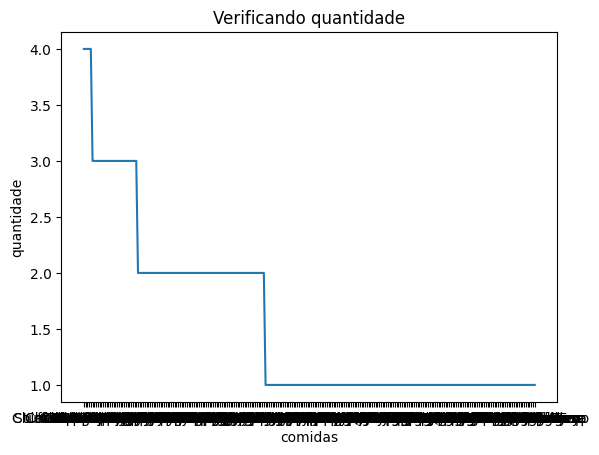

In [195]:
# Mostrando gráfico
x = alimentos['comida']
y = alimentos['quantidade']

plt.plot(x, y)
plt.xlabel('comidas')
plt.ylabel('quantidade')
plt.title('Verificando quantidade')

plt.show()

{'grupo4': 20, 'grupo3': 78, 'grupo2': 146, 'grupo1': 155} 



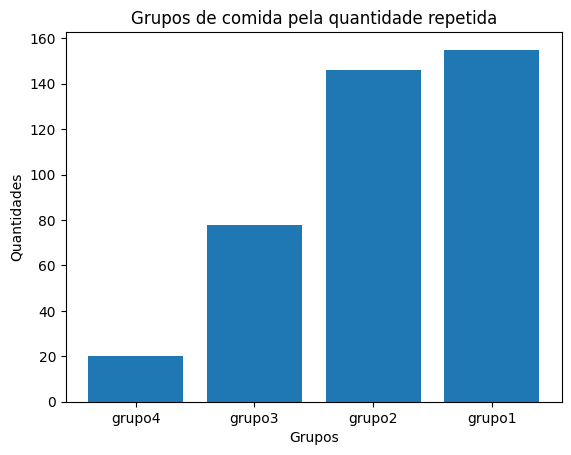

In [196]:
# O gráfico está horrivel por isso vamos classifcar em grupos os valores iguais e separa-los
grup4 = alimentos.loc[alimentos['quantidade'] == 4]

grup3 = alimentos.loc[alimentos['quantidade'] == 3]

grup2 = alimentos.loc[alimentos['quantidade'] == 2]

grup1 = alimentos.loc[alimentos['quantidade'] == 1]

# criaremos um objeto para valores x e y
objeto = {
    'grupo4': grup4['quantidade'].sum(),
    'grupo3': grup3['quantidade'].sum(),
    'grupo2': grup2['quantidade'].sum(),
    'grupo1': grup1['quantidade'].sum()
}
print(objeto, '\n')

objeto = pd.DataFrame(['grupo4', 'grupo3', 'grupo2', 'grupo1'],
                      [objeto['grupo4'], objeto['grupo3'], objeto['grupo2'], objeto['grupo1']]).reset_index()
objeto.columns = ['quantidade', 'grupo']

x = objeto['grupo']
y = objeto['quantidade']

plt.bar(x, y)
plt.xlabel('Grupos')
plt.ylabel('Quantidades')
plt.title('Grupos de comida pela quantidade repetida')
plt.show()

### Com essa informação gráfica podemos criar um data frame de relações entre os dados por grupo

sabemos que o menor em repetição é o **grupo 4**, vamos começar por ele:

In [197]:
grup4

,comida,quantidade
0,Stuffed Bell Peppers,4
1,Chicken Noodle Soup,4
2,Chicken Curry,4
3,Ratatouille,4
4,Caesar Salad Wrap,4


In [198]:
# se sabemos que há apenas 5 alimentos da mesma quantidade, podemos filtrar no DataFrame original
dataFilter = df.copy()

# trocando nome das colunas para portugues
dataFilter.columns = ['comida', 'ingredientes', 'adocante', 'gordura_oleo', 'tempero', 'alergenos', 'predicao']
dataFilter.head()

,comida,ingredientes,adocante,gordura_oleo,tempero,alergenos,predicao
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains
3,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains
4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,Contains


In [199]:
# Lista de comida do grupo 4 : ['Stuffed Bell Peppers', 'Chicken Noodle Soup', 'Chicken Curry', 'Ratatouille', 'Caesar Salad Wrap']

# Localizando apenas as comidas do grupo 4
data_grup = dataFilter.loc[dataFilter['comida'].isin(grup4['comida'])]
display(data_grup)

print('\n Com o dataframe acima percebe-se que existe um padrão para o alimento ser contaminado, vamos friltrar apenas os contaminados!')

,comida,ingredientes,adocante,gordura_oleo,tempero,alergenos,predicao
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains
3,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains
14,Caesar Salad Wrap,Grilled chicken,None,Caesar dressing,"Lettuce, Parmesan cheese",Dairy,Contains
144,Chicken Curry,Chicken,None,Vegetable oil,Curry powder,None,Does not contain
145,Ratatouille,Eggplant,None,Olive oil,Tomatoes,None,Does not contain
160,Ratatouille,Eggplant,None,Olive oil,"Tomatoes, zucchini",None,Does not contain
172,Stuffed Bell Peppers,Bell peppers,None,Olive oil,"Ground meat, rice",None,Does not contain
188,Ratatouille,Vegetables,None,Olive oil,"Herbs, garlic",None,Does not contain
200,Chicken Curry,Chicken,None,Coconut milk,Curry powder,None,Does not contain
204,Stuffed Bell Peppers,Bell peppers,None,Olive oil,"Ground meat, rice",None,Does not contain



 Com o dataframe acima percebe-se que existe um padrão para o alimento ser contaminado, vamos friltrar apenas os contaminados!


In [200]:
# Filtrando apenas os contaminados
classificados = data_grup.loc[data_grup['predicao'] == 'Contains']
classificados

,comida,ingredientes,adocante,gordura_oleo,tempero,alergenos,predicao
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains
3,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains
14,Caesar Salad Wrap,Grilled chicken,None,Caesar dressing,"Lettuce, Parmesan cheese",Dairy,Contains
351,Caesar Salad Wrap,Romaine lettuce,None,Caesar dressing,"Parmesan cheese, croutons","Wheat, Dairy",Contains
352,Caesar Salad Wrap,Romaine lettuce,None,Caesar dressing,"Parmesan cheese, croutons","Wheat, Dairy",Contains
372,Caesar Salad Wrap,Romaine lettuce,None,Caesar dressing,"Parmesan cheese, croutons","Wheat, Dairy",Contains


### formulação observada por tipos de dados:

f(x) = nossa comida contaminada ou não (valor sim ou não)

Nota-se que existe critérios para um alimentos ser contaminado, na coluna de allergens (alergenos) e demais colunas

*Correlações:*

se o alimento contem no

 **tempero**: *Salt*, *Lettuce*, *Parmesan cheese* e *croutons*.

 **alergenos**: *Chicken*, *Wheat*, *Celery* e *Dairy*.

*Existe uma probabilidade dele está contaminado.*

No **grupo 4** temos uma base de F(x), faremos a análise dos próximos grupos para definir a fórmula.

In [201]:
# Fazendo análise do grupo 3
grup3

,comida,quantidade
5,Chicken Enchiladas,3
6,Baked Ziti,3
7,Mango Salsa,3
8,Cucumber Salad,3
9,Beef Stir-Fry,3
10,Chicken Satay,3
11,Apple Crisp,3
12,Chicken Parmesan,3
13,Spinach Salad,3
14,Chocolate Mousse,3


In [202]:
# Lista de alimentos no grupo 3 : ['Chicken Enchiladas', 'Baked Ziti', 'Mango Salsa', 'Cucumber Salad', 'Beef Stir-Fry', 'Chicken Satay', 'Apple Crisp', 'Chicken Parmesan',
# 'Spinach Salad', 'Chocolate Mousse', 'Tandoori Chicken', 'Garlic Bread', 'Pumpkin Pie', 'Beef Tacos', 'Tiramisu', 'Pesto Chicken',
# 'Apple Pie', 'Blueberry Muffins', 'Baked Salmon', 'Strawberry Smoothie', 'Oatmeal Raisin Cookies', 'Chicken Caesar Salad', 'Caprese Salad', 'Lemon Bars', 'Cinnamon Rolls', 'Beef Stroganoff']
grup3_loc = dataFilter.loc[dataFilter['comida'].isin(grup3['comida'])]
display(grup3_loc)

,comida,ingredientes,adocante,gordura_oleo,tempero,alergenos,predicao
9,Strawberry Smoothie,Strawberries,Honey,"Yogurt (milk, cultures)",None,Dairy,Contains
15,Caprese Salad,Tomatoes,None,Olive oil,"Mozzarella cheese, basil",Dairy,Contains
21,Beef Stroganoff,Beef,None,Sour cream,"Mushroom, onion",Dairy,Contains
24,Chicken Parmesan,Chicken,None,"Bread crumbs, Parmesan cheese",Marinara sauce,Dairy,Contains
43,Chocolate Mousse,Chocolate,Sugar,Heavy cream,Vanilla extract,Dairy,Contains
...,...,...,...,...,...,...,...
384,Pumpkin Pie,Pumpkin,Sugar,Butter,"Pumpkin spice, pastry","Wheat, Dairy",Contains
385,Blueberry Muffins,Flour,Sugar,Butter,Blueberries,"Wheat, Dairy",Contains
390,Tiramisu,Ladyfingers,Sugar,"Mascarpone cheese, coffee liqueur",Cocoa powder,"Wheat, Dairy, Alcohol",Contains
393,Lemon Bars,Lemon juice,Sugar,Butter,"Flour, eggs","Wheat, Dairy, Eggs",Contains


In [203]:
# DataFrame muito grande para visualização, vamos verificar apenas os contaminados
contaminados = grup3_loc.loc[grup3_loc['predicao'] == 'Contains']
contaminados

,comida,ingredientes,adocante,gordura_oleo,tempero,alergenos,predicao
9,Strawberry Smoothie,Strawberries,Honey,"Yogurt (milk, cultures)",None,Dairy,Contains
15,Caprese Salad,Tomatoes,None,Olive oil,"Mozzarella cheese, basil",Dairy,Contains
21,Beef Stroganoff,Beef,None,Sour cream,"Mushroom, onion",Dairy,Contains
24,Chicken Parmesan,Chicken,None,"Bread crumbs, Parmesan cheese",Marinara sauce,Dairy,Contains
43,Chocolate Mousse,Chocolate,Sugar,Heavy cream,Vanilla extract,Dairy,Contains
45,Caprese Salad,Tomatoes,None,Olive oil,"Mozzarella cheese, basil",Dairy,Contains
46,Tandoori Chicken,Chicken,None,Yogurt,Tandoori spices,Dairy,Contains
47,Beef Stroganoff,Beef,None,Sour cream,"Mushrooms, onions",Dairy,Contains
48,Strawberry Smoothie,Strawberries,Sugar,Yogurt,Milk,Dairy,Contains
59,Chocolate Mousse,Chocolate,Sugar,Heavy cream,Vanilla extract,Dairy,Contains


Sabemos pelo grupo 4 que Wheat e Dairy (trigo e lacteo) possuem valores de contaminação

Vamos retornar apenas os diferentes desses para encontrar os desvios

In [204]:
print('Atualmente ele tem {} de tamnho em shape'.format(contaminados.shape))

Atualmente ele tem (60, 7) de tamnho em shape


In [205]:
retorno_desvio = contaminados.loc[~contaminados['alergenos'].isin(['Dairy', 'Wheat, Dairy', 'Wheat, Dairy, Eggs', 'Wheat, Dairy, Alcohol', 'Pine nuts, Dairy', 'Dairy, Cocoa', 'Dairy, Anchovies'])]
retorno_desvio

,comida,ingredientes,adocante,gordura_oleo,tempero,alergenos,predicao
105,Baked Salmon,Salmon fillet,None,Olive oil,"Lemon, herbs",Fish,Contains
107,Baked Salmon,Salmon,None,Olive oil,"Lemon, herbs",Fish,Contains
109,Baked Salmon,Salmon,None,Olive oil,"Lemon, herbs",Fish,Contains
276,Chicken Satay,Chicken,None,Peanut butter,Soy sauce,Peanuts,Contains
279,Chicken Satay,Chicken,None,Peanut oil,"Satay sauce, spices",Peanuts,Contains
280,Chicken Satay,Chicken,None,Peanut oil,"Satay sauce, spices",Peanuts,Contains


Essa observação do grupo 3 foi fundamental, existe uma relação indireta de aves na coluna de ingredientes com o grupo 4, apesar dos alergenos serem diferentes de leite ou trigo. Essa informação deve ser acrescentada.

Quando se trata de **alergenos** temos dois novos critérios como *Fish* (peixe) e *Peanuts*.

as demais colunas seguem desta forma;

**comida**: *Baked Salmon*, *Chicken Satay*

**ingredientes**: *Salmon fillet*, *Salmon*, *Chicken*.

**gordura e oleo**: *Olive oil*, *Peanut butter*, *Peanut oil*

**tempero**: *Lemon, herbs*, *Soy sauce*, *Satay sauce, spices*

**alergenos**: *Fish*, *Peanuts*

In [206]:
# Fazendo análise do grupo 2
grup2

,comida,quantidade
31,Lobster Roll,2
32,Lemon Garlic Shrimp,2
33,Apple,2
34,Lobster Bisque,2
35,Teriyaki Salmon,2
...,...,...
99,French Onion Soup,2
100,Greek Yogurt,2
101,Sausage and Pepper Pizza,2
102,Berry Parfait,2


In [207]:
grupo2 = dataFilter.loc[dataFilter['comida'].isin(grup2['comida'])]
grupo2

,comida,ingredientes,adocante,gordura_oleo,tempero,alergenos,predicao
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
7,Caesar Salad,Romaine lettuce,None,Olive oil,Parmesan cheese,Dairy,Contains
11,Margherita Pizza,Cheese,None,None,"Tomato sauce, basil",Dairy,Contains
13,Greek Yogurt,"Yogurt (milk, cultures)",None,None,None,Dairy,Contains
...,...,...,...,...,...,...,...
381,Baked Apple,Apples,Sugar,Butter,"Cinnamon, oats","Wheat, Dairy",Contains
386,Sausage and Pepper Pizza,Pizza dough,None,None,"Sausage, bell peppers","Wheat, Dairy",Contains
387,Beef Wellington,Beef,None,Butter,"Mushrooms, puff pastry","Wheat, Dairy",Contains
396,Zucchini Bread,Zucchini,Sugar,Butter,"Cinnamon, nuts","Wheat, Dairy, Nuts",Contains


In [208]:
# Eliminando os não contaminados
grupo_cont = grupo2.loc[grupo2['predicao'] == 'Contains']
grupo_cont

,comida,ingredientes,adocante,gordura_oleo,tempero,alergenos,predicao
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
7,Caesar Salad,Romaine lettuce,None,Olive oil,Parmesan cheese,Dairy,Contains
11,Margherita Pizza,Cheese,None,None,"Tomato sauce, basil",Dairy,Contains
13,Greek Yogurt,"Yogurt (milk, cultures)",None,None,None,Dairy,Contains
...,...,...,...,...,...,...,...
381,Baked Apple,Apples,Sugar,Butter,"Cinnamon, oats","Wheat, Dairy",Contains
386,Sausage and Pepper Pizza,Pizza dough,None,None,"Sausage, bell peppers","Wheat, Dairy",Contains
387,Beef Wellington,Beef,None,Butter,"Mushrooms, puff pastry","Wheat, Dairy",Contains
396,Zucchini Bread,Zucchini,Sugar,Butter,"Cinnamon, nuts","Wheat, Dairy, Nuts",Contains


In [209]:
# eliminaremos todos os que tem leite, trigo
lista_tl = ['Dairy', 'Wheat', 'Wheat, Dairy', 'Wheat, Dairy, Eggs', 'Wheat, Dairy, Alcohol', 'Pine nuts, Dairy', 'Dairy, Cocoa', 'Wheat, Dairy, Cocoa	', 'Dairy, Nuts', 'Eggs, Dairy', 'Dairy, Eggs',\
            'Dairy, Anchovies', 'Almonds, Wheat, Dairy', 'Wheat, Dairy, Nuts', 'Dairy, Wheat','Wheat, Dairy, Cocoa', 'Wheat, Pork, Dairy', 'Dairy, Ghee', 'Dairy, Fish', 'Fish, Dairy', 'Shellfish, Dairy']

retorno_desvio = grupo_cont.loc[~grupo_cont['alergenos'].isin(lista_tl)]

# Agrupando todos os valores iguais por todas as colunas
d = retorno_desvio.drop_duplicates()
d

,comida,ingredientes,adocante,gordura_oleo,tempero,alergenos,predicao
98,Egg Salad,Eggs,Mayonnaise,None,"Celery, onion",Eggs,Contains
103,Fish Sticks,Fish fillets,None,Vegetable oil,Salt,Fish,Contains
106,Teriyaki Salmon,Salmon,None,Vegetable oil,Teriyaki sauce,Fish,Contains
116,Teriyaki Salmon,Salmon fillet,Sugar,Soy sauce,"Ginger, garlic","Fish, Soybeans",Contains
117,Sushi Bowl,Sushi rice,None,Soy sauce,"Raw fish, vegetables","Fish, Soybeans",Contains
118,Honey Soy Glazed Salmon,Salmon,Honey,Soy sauce,"Garlic, ginger","Fish, Soybeans",Contains
121,Milk Chocolate,Sugar,Cocoa butter,Milk powder,Vanilla extract,Milk,Contains
125,Strawberry Yogurt,"Yogurt (milk, cultures)",Sugar,None,Pectin,"Milk, Strawberries",Contains
134,Honey Mustard Chicken,Chicken breast,Honey,Mustard,Vegetable oil,None,Contains
277,Peanut Butter,Peanuts,Sugar,Vegetable oil,Salt,Peanuts,Contains


Nessa análise, o grupo 2 não nos informa com clareza como um tipo de dado se relaciona com o outro, apesar de um pequeno padrão nos peixes na coluna de alergenos, o valor de Milk (leite), também foi acrescentado, por ser um lacteo. As demais colunas estão sem uniformidade aparente.

In [210]:
# Faremos a ultima análise, o grupo 1
grup1

,comida,quantidade
104,Samosa,1
105,Vada Pav,1
106,Vegetable Biryani,1
107,Chana Masala,1
108,Pani Puri,1
...,...,...
254,Veggie Burger,1
255,Vegetable Soup,1
256,Minestrone Soup,1
257,Salsa,1


In [211]:
# achando as 155 comidas
grupo1 = dataFilter.loc[dataFilter['comida'].isin(grup1['comida'])]

# removendo o que ja conhecemos por leite e trigo
grupo1 = grupo1.loc[~grupo1['alergenos'].isin(lista_tl)]
display(grupo1)

,comida,ingredientes,adocante,gordura_oleo,tempero,alergenos,predicao
97,Omelette,Eggs,None,Butter,"Salt, pepper",Eggs,Contains
101,Egg Salad Sandwich,Eggs,Mayonnaise,None,"Celery, mustard","Eggs, Mustard",Contains
102,Egg Fried Rice,Eggs,None,Sesame oil,Soy sauce,"Eggs, Soybeans",Contains
108,Lemon Dill Salmon,Salmon,None,Olive oil,"Lemon, dill",Fish,Contains
110,Malabar Fish Curry,Fish,None,Coconut oil,"Tamarind, spices","Fish, Coconut",Contains
...,...,...,...,...,...,...,...
300,Shrimp Fried Rice,Shrimp,None,Vegetable oil,Soy sauce,"Shellfish, Soybeans",Contains
304,Miso Soup,Miso paste,None,None,"Tofu, seaweed",Soybeans,Contains
305,Tofu Scramble,Tofu,None,Vegetable oil,"Turmeric, spices",Soybeans,Contains
308,Teriyaki Beef,Beef,None,Soy sauce,"Teriyaki sauce, vegetables",Soybeans,Contains


Assim como no grupo 2 o excesso de dados não nos da uma relação especifica, usaremos o grupo 4 e grupo 3 para cobertura de critérios ja conhecidos

Faremos uma análise agora dos não contaminados, a nossa função deve prever uma comparação, se o alimento é contaminado com base nos parametros passados, então ele é diferente dos não contaminados, o valor deve dar diferente para operação da análise estar correta.

In [212]:
# Iremos utilizar o grupo 4 para achar os não contaminados e descobri a diferença
grup4

,comida,quantidade
0,Stuffed Bell Peppers,4
1,Chicken Noodle Soup,4
2,Chicken Curry,4
3,Ratatouille,4
4,Caesar Salad Wrap,4


In [213]:
dataFilter

,comida,ingredientes,adocante,gordura_oleo,tempero,alergenos,predicao
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains
3,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains
4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,Contains
...,...,...,...,...,...,...,...
394,Lemon Bars,Lemon juice,Sugar,Butter,"Flour, eggs","Wheat, Dairy, Eggs",Contains
395,Pecan Pie,Pecans,Sugar,Butter,Corn syrup,"Wheat, Dairy, Nuts",Contains
396,Zucchini Bread,Zucchini,Sugar,Butter,"Cinnamon, nuts","Wheat, Dairy, Nuts",Contains
397,Banana Bread,Bananas,Sugar,Butter,"Cinnamon, nuts","Wheat, Dairy, Nuts",Contains


In [214]:
# selecionando apenas as 5 comidas e obtendo os não contaminados
grupo4 = dataFilter.loc[dataFilter['comida'].isin(grup4['comida'])]
grupo4 = grupo4.loc[grupo4['predicao'] == 'Does not contain']
grupo4

,comida,ingredientes,adocante,gordura_oleo,tempero,alergenos,predicao
144,Chicken Curry,Chicken,None,Vegetable oil,Curry powder,None,Does not contain
145,Ratatouille,Eggplant,None,Olive oil,Tomatoes,None,Does not contain
160,Ratatouille,Eggplant,None,Olive oil,"Tomatoes, zucchini",None,Does not contain
172,Stuffed Bell Peppers,Bell peppers,None,Olive oil,"Ground meat, rice",None,Does not contain
188,Ratatouille,Vegetables,None,Olive oil,"Herbs, garlic",None,Does not contain
200,Chicken Curry,Chicken,None,Coconut milk,Curry powder,None,Does not contain
204,Stuffed Bell Peppers,Bell peppers,None,Olive oil,"Ground meat, rice",None,Does not contain
205,Stuffed Bell Peppers,Bell peppers,None,Olive oil,"Ground meat, rice",None,Does not contain
211,Chicken Noodle Soup,Chicken,None,Vegetable oil,"Noodles, vegetables",None,Does not contain
233,Ratatouille,Vegetables,None,Olive oil,Herbs,None,Does not contain


Uma informação importante, é de que o alimento sem contaminação não possui alergenos (logo, se existe um alergeno no alimento, ele esta contaminado)

percebe-se também que o tipo de prato não é um critério para definir se contem um alergeno, por que são os mesmos pratos que contem alergenos

com isso, as colunas com caracteristicas de não alergia são :

**ingredientes**; *Chiken, Eggplant, Bell peppers, Vegetables*

**gordura_oleo**; *Vegetable oil, Olive oil, Coconut milk*

**tempero**; *'Curry powder' 'Curry spices' 'Ground meat, rice' 'Herbs' 'Herbs, garlic', 'Noodles, vegetables' 'Tomatoes' 'Tomatoes, zucchini'*

esses itens acima **não** contem alergenos, todos tem **valor 0** por padrão

In [215]:
# Buscando em todo dataframe os não contaminados
nc = dataFilter.loc[dataFilter['predicao'] == 'Contains']
nc

,comida,ingredientes,adocante,gordura_oleo,tempero,alergenos,predicao
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains
3,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains
4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,Contains
...,...,...,...,...,...,...,...
394,Lemon Bars,Lemon juice,Sugar,Butter,"Flour, eggs","Wheat, Dairy, Eggs",Contains
395,Pecan Pie,Pecans,Sugar,Butter,Corn syrup,"Wheat, Dairy, Nuts",Contains
396,Zucchini Bread,Zucchini,Sugar,Butter,"Cinnamon, nuts","Wheat, Dairy, Nuts",Contains
397,Banana Bread,Bananas,Sugar,Butter,"Cinnamon, nuts","Wheat, Dairy, Nuts",Contains


In [216]:
# Descobrindo o alimento que não contém alergeno e mesmo assim é alergico
print(np.unique(nc['alergenos']))

['Almonds, Wheat, Dairy' 'Chicken, Wheat, Celery' 'Dairy'
 'Dairy, Anchovies' 'Dairy, Cocoa' 'Dairy, Eggs' 'Dairy, Fish'
 'Dairy, Ghee' 'Dairy, Nuts' 'Dairy, Wheat' 'Eggs' 'Eggs, Dairy'
 'Eggs, Mustard' 'Eggs, Soybeans' 'Fish' 'Fish, Coconut' 'Fish, Dairy'
 'Fish, Eggs' 'Fish, Soybeans' 'Milk' 'Milk, Strawberries' 'None'
 'Oats, Dairy' 'Peanuts' 'Pine nuts, Dairy' 'Rice, Dairy' 'Shellfish'
 'Shellfish, Dairy' 'Shellfish, Eggs' 'Shellfish, Pork'
 'Shellfish, Soybeans' 'Soybeans' 'Soybeans, Fish' 'Wheat' 'Wheat, Dairy'
 'Wheat, Dairy, Alcohol' 'Wheat, Dairy, Cocoa' 'Wheat, Dairy, Eggs'
 'Wheat, Dairy, Nuts' 'Wheat, Pork, Dairy']


In [217]:
# esses são os alimentos que não contém alergenos mas estao contaminados
nc = nc.loc[nc['alergenos'] == 'None']
nc

,comida,ingredientes,adocante,gordura_oleo,tempero,alergenos,predicao
133,Spaghetti Bolognese,Ground beef,Sugar,Olive oil,Tomato sauce,None,Contains
134,Honey Mustard Chicken,Chicken breast,Honey,Mustard,Vegetable oil,None,Contains
135,BBQ Ribs,Pork ribs,Brown sugar,Vegetable oil,BBQ sauce,None,Contains
257,Samosa,Potatoes,None,Ghee,Spices,None,Contains
262,Rajma Chawal,Kidney beans,None,Ghee,Spices,None,Contains


Com esses dados temos as seguintes informações:

**comida**; *'BBQ Ribs' 'Honey Mustard Chicken' 'Rajma Chawal' 'Samosa'
 'Spaghetti Bolognese'*

 **ingredientes**; *'Chicken breast' 'Ground beef' 'Kidney beans' 'Pork ribs' 'Potatoes'*

 **adocante**; *'Brown sugar' 'Honey' 'None' 'Sugar'*

 **gordura_oleo**; *'Ghee' 'Mustard' 'Olive oil' 'Vegetable oil'*

 **tempero**; *'BBQ sauce' 'Spices' 'Tomato sauce' 'Vegetable oil'*